In [1]:
    import pandas as pd 
    import requests as rq
    import numpy as np
    import collections


In [2]:
#matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mlp
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib import rcParams

In [12]:
#getting the speech from the url
website_url = rq.get('https://lopezobrador.org.mx/2021/04/22/discurso-del-presidente-andres-manuel-lopez-obrador-en-su-participacion-en-la-cumbre-de-lideres-sobre-el-cambio-climatico/').text

In [13]:
import lxml

In [14]:
from bs4 import BeautifulSoup 
soup = BeautifulSoup(website_url, "lxml")

In [15]:
#retriving text from "p" founds
data = [element.text for element in soup.find_all("p")]
#convert tu string
data = str(data)
data

"['2021: Año de la Independencia', 'Empiezo explicando que, aunque hemos descubierto tres grandes yacimientos de hidrocarburos, el petróleo que estamos descubriendo se destinará, básicamente, a cubrir la demanda de combustibles del mercado interno y se acabará con la práctica de exportar crudo, petróleo crudo y comprar gasolinas. De esta forma ayudaremos a evitar el uso excesivo de combustibles fósiles.', '', 'También estamos modernizando nuestras plantas hidroeléctricas para reducir el uso de combustóleo o carbón en la producción de electricidad.', 'La energía que se produce con agua es limpia y barata. De ahí que hemos decidido cambiar turbinas antiguas por equipos modernos, lo cual nos permitirá aprovechar el agua de los embalses para producir más energía, sin construir nuevas presas y sin causar afectaciones.', 'La tercera propuesta consiste en compartir con ustedes, en especial con usted, presidente Biden, una experiencia exitosa: estamos aplicando el programa Sembrando Vida, que 

In [16]:
!pip -q install wordcloud 

In [17]:
!pip -q install stop-words

In [18]:
#words that we want to ignore
from stop_words import get_stop_words
#spanish stop words
stop_words_es = get_stop_words('es')

In [19]:
from wordcloud import WordCloud, STOPWORDS

stop_words_es

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [32]:
stop_words = ['año', 'mil', 'pesos', 'ciento', 'millones', 'tres', 'ustedes'] + stop_words_es

amlo_wc = WordCloud(
    background_color = 'white',
    max_words = 2000,
    stopwords = stop_words
)
#generate wordcloud
amlo_wc.generate(data)

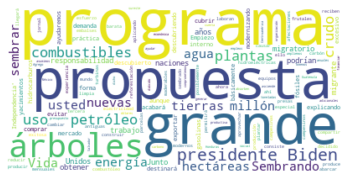

In [33]:
#display the WordCloud
plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

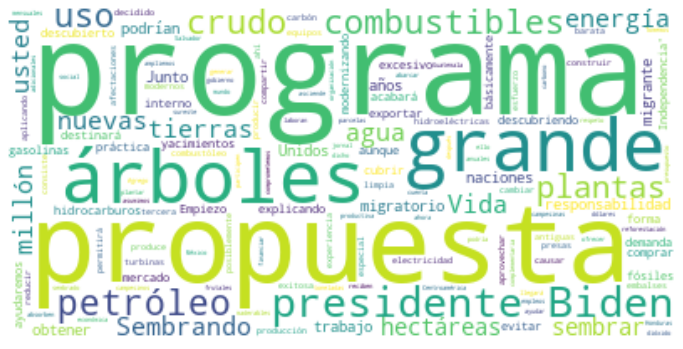

In [34]:
#re generate the word cloud
amlo_wc.generate(data)

#display the cloud
fig = plt.figure()
#set width
fig.set_figwidth(12)
#set height
fig.set_figheight(16)

plt.imshow(amlo_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

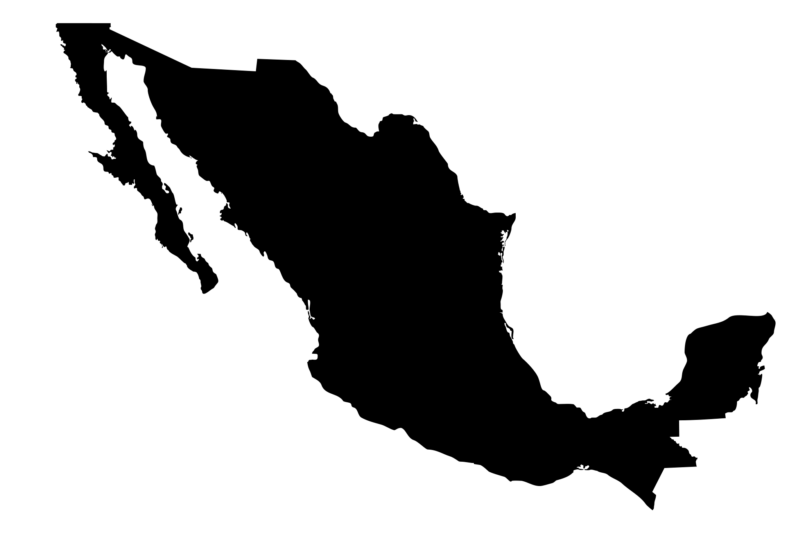

In [53]:
mx_mask = np.array(Image.open('mx-map.png'))

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, vmin=255, vmax=255, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
mx_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [64]:
amlo_wc_mx = WordCloud(background_color='white', max_words=300, mask=mx_mask, stopwords=stop_words)

In [65]:
amlo_wc_mx.generate(data)

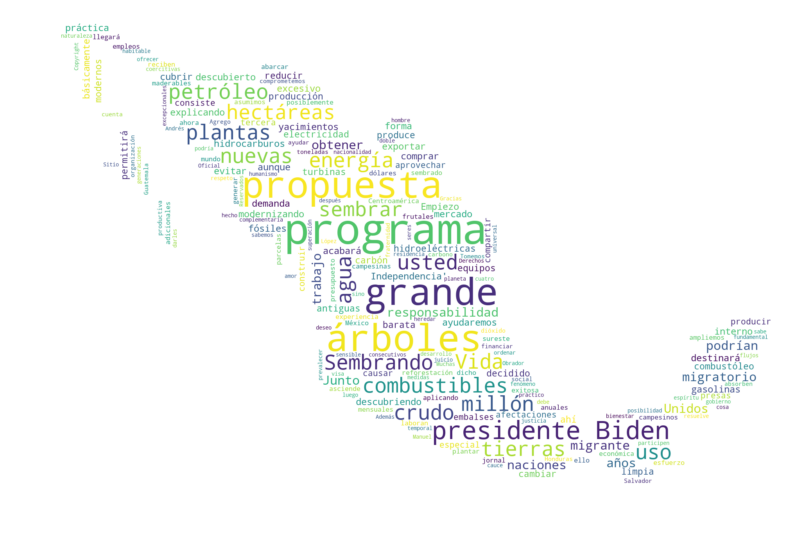

In [66]:
fig_mx = plt.figure()
fig_mx.set_figwidth(14) # set width
fig_mx.set_figheight(18) # set height


plt.imshow(amlo_wc_mx, interpolation='bilinear')
plt.axis('off')
plt.show()